In [3]:
! which python
#confirm you are in the correct virtual environment for mordecai

/Users/emmastiefel/Documents/GitHub/disaster-tweets-classifier/sos-env/bin/python


In [94]:
from mordecai import Geoparser
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
#import all data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
#add column for geoparsed locations
train.insert(0, 'geoparsed_location', [[] for i in range(len(train))])
train.head()

,geoparsed_location,id,keyword,location,text,target
0,[],1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,[],4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,[],5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,[],6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,[],7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [43]:
test_string = train.at[1, 'text']
test_string

'Forest fire near La Ronge Sask. Canada'

In [57]:
geo = Geoparser(verbose=True)
test_result = geo.geoparse('cincinnati, ohio')

Models path: /Users/emmastiefel/Documents/GitHub/disaster-tweets-classifier/sos-env/lib/python3.7/site-packages/mordecai/models/


In [58]:
test_result

[{'text': 'cincinnati',
  'label': 'United States',
  'word': 'cincinnati',
  'spans': [{'start': 0, 'end': 10}],
  'features': {'maj_vote': 'USA',
   'word_vec': 'USA',
   'first_back': 'PHL',
   'most_alt': 'USA',
   'most_pop': 'USA',
   'ct_mention': '',
   'ctm_count1': 0,
   'ct_mention2': '',
   'ctm_count2': 0,
   'wv_confid': 36.37693405151367,
   'class_mention': '',
   'code_mention': ''},
  'country_predicted': 'USA',
  'country_conf': 0.957188,
  'all_countries': array(['USA', 'PHL'], dtype='<U3'),
  'all_confidence': array([0.957188  , 0.01826525], dtype=float32),
  'geo': {'admin1': 'Ohio',
   'lat': '39.12711',
   'lon': '-84.51439',
   'country_code3': 'USA',
   'geonameid': '4508722',
   'place_name': 'Cincinnati',
   'feature_class': 'P',
   'feature_code': 'PPLA2'},
  'place_confidence': 1.0},
 {'text': 'ohio',
  'label': 'United States',
  'word': 'ohio',
  'spans': [{'start': 12, 'end': 16}],
  'features': {'maj_vote': 'USA',
   'word_vec': 'USA',
   'first_back':

In [61]:
#iterate through the results for each location entity identified
this_geoparsed_locations = []
for location in test_result:
    #check if it successfully labelled location/if it met the 0.6 confidence threshold
    if location['label']:
        #store relevant information from result
        geoparsed_locations.append(location['geo'])


In [81]:
##iterate through every row and geoparse location data
for i, row in train.iterrows():
    print(i, ': start')
    this_location = row['location']
    this_geoparsed_locations = []
    #skip locations that arent strings
    if type(this_location) == type('s'):
        this_result = geo.geoparse(this_location)
        #iterate through the results for each location entity identified
        for location in this_result:
            #check if it successfully labelled location/if it met the 0.6 confidence threshold
            if len(location['label']) > 0:
                #store relevant information from result
                try:
                    this_geoparsed_locations.append(location['geo'])
                except: #handle an error where it identifies a location but didnt have the geo dictionary, because confidence is too low
                    pass
        #store in dataframe
        train.at[i, 'geoparsed_location'] = this_geoparsed_locations
    #print for checking accuracy
    print(this_location, this_geoparsed_locations)

North Carolina', 'lat': '35.22709', 'lon': '-80.84313', 'country_code3': 'USA', 'geonameid': '4460243', 'place_name': 'Charlotte', 'feature_class': 'P', 'feature_code': 'PPLA2'}]
7468 : start
moss chamber b []
7469 : start
nan []
7470 : start
nan []
7471 : start
1/10 Taron squad []
7472 : start
nan []
7473 : start
Argentina [{'admin1': 'Santa Fe Province', 'lat': '-32.92616', 'lon': '-60.73918', 'country_code3': 'ARG', 'geonameid': '6269145', 'place_name': 'Centro Cultural Antártida Argentina', 'feature_class': 'S', 'feature_code': 'RSTNQ'}]
7474 : start
 ?currently writing a book? []
7475 : start
Lebanon, Tennessee [{'admin1': 'NA', 'lat': '33.83333', 'lon': '35.83333', 'country_code3': 'LBN', 'geonameid': '272103', 'place_name': 'Lebanon', 'feature_class': 'A', 'feature_code': 'PCLI'}, {'admin1': 'Tennessee', 'lat': '35.75035', 'lon': '-86.25027', 'country_code3': 'USA', 'geonameid': '4662168', 'place_name': 'Tennessee', 'feature_class': 'A', 'feature_code': 'ADM1'}]
7476 : start
Pra

In [85]:
##repeat, but for text data instead of location data
#train.insert(0, 'geoparsed_text', [[] for i in range(len(train))])
geo = Geoparser(verbose=True)
for i, row in train.iterrows():
    print(i, ': start')
    this_location = row['text']
    this_geoparsed_locations = []
    #skip locations that arent strings
    if type(this_location) == type('s'):
        try:
            this_result = geo.geoparse(this_location)
        except:
            print('ERROR!!!!!')
            this_result = []
        #iterate through the results for each location entity identified
        for location in this_result:
            #check if it successfully labelled location/if it met the 0.6 confidence threshold
            if len(location['label']) > 0:
                #store relevant information from result
                try:
                    this_geoparsed_locations.append(location['geo'])
                except: #handle an error where it identifies a location but didnt have the geo dictionary, because confidence is too low
                    pass
        #store in dataframe
        train.at[i, 'geoparsed_text'] = this_geoparsed_locations
    #print for checking accuracy
    print(this_location, this_geoparsed_locations)

 RÌ©union Island is it possible t...  http://t.co/qNVXJ2pAlJ [{'admin1': 'NA', 'lat': '-29', 'lon': '24', 'country_code3': 'ZAF', 'geonameid': '953987', 'place_name': 'Republic of South Africa', 'feature_class': 'A', 'feature_code': 'PCLI'}, {'admin1': 'Kentucky', 'lat': '37.44505', 'lon': '-87.14389', 'country_code3': 'USA', 'geonameid': '4295982', 'place_name': 'Island', 'feature_class': 'P', 'feature_code': 'PPL'}]
7528 : start
Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/DtFSWNJZIL [{'admin1': 'NA', 'lat': '2.5', 'lon': '112.5', 'country_code3': 'MYS', 'geonameid': '1733045', 'place_name': 'Malaysia', 'feature_class': 'A', 'feature_code': 'PCLI'}]
7529 : start
Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/EdEKrmqTpQ [{'admin1': 'NA', 'lat': '2.5', 'lon': '112.5', 'country_code3': 'MYS', 'geonameid': '1733045', 'place_name':

In [88]:
train.to_csv('data/geoparsed-train-v1.csv') ##store prelliminary data in csv

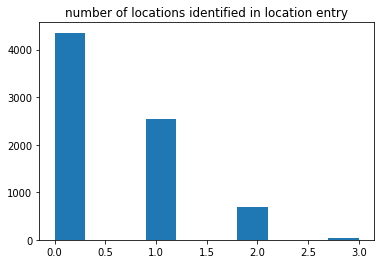

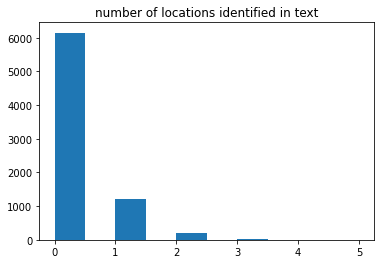

In [97]:
##check number of locations identified for location and text data
plt.hist([len(r['geoparsed_location']) for i, r in train.iterrows()])
plt.title('number of locations identified in location entry')
plt.show()
plt.hist([len(r['geoparsed_text']) for i, r in train.iterrows()])
plt.title('number of locations identified in text')
plt.show()
#it looks like both text and location entries mostly had less than 2 geoparsed locations, so we will only store two for each

In [119]:
##insert columns to store info for geoparsed locations in location and text data
#store name, coordinates, and country for each location
train.insert(7, 'gp_loc_1_place_name', ['' for i in range(len(train))])
train.insert(7, 'gp_loc_1_country', ['' for i in range(len(train))])
train.insert(7, 'gp_loc_1_lat', [0.0 for i in range(len(train))])
train.insert(7, 'gp_loc_1_long', [0.0 for i in range(len(train))])

train.insert(7, 'gp_loc_2_place_name', ['' for i in range(len(train))])
train.insert(7, 'gp_loc_2_country', ['' for i in range(len(train))])
train.insert(7, 'gp_loc_2_lat', [0.0 for i in range(len(train))])
train.insert(7, 'gp_loc_2_long', [0.0 for i in range(len(train))])

train.insert(7, 'gp_txt_1_place_name', ['' for i in range(len(train))])
train.insert(7, 'gp_txt_1_country', ['' for i in range(len(train))])
train.insert(7, 'gp_txt_1_lat', [0.0 for i in range(len(train))])
train.insert(7, 'gp_txt_1_long', [0.0 for i in range(len(train))])

train.insert(7, 'gp_txt_2_place_name', ['' for i in range(len(train))])
train.insert(7, 'gp_txt_2_country', ['' for i in range(len(train))])
train.insert(7, 'gp_txt_2_lat', [0.0 for i in range(len(train))])
train.insert(7, 'gp_txt_2_long', [0.0 for i in range(len(train))])

#check if columns were inserted successfully
train.columns

ValueError: cannot insert gp_loc_1_place_name, already exists

In [131]:
#fill in columns with stored geoparsing results
for index, row in train.iterrows():
    #fill in geoparsed LOCATION data:
    if len(row['geoparsed_location']) > 0: #check if geoparsed data was collected
        info = row['geoparsed_location']
        for i in range(min(len(info), 2)): #iterate through info for max two geoparsed places
            geo_dict = info[i]
            if 'NOT GEO' in geo_dict: #skip ones that aren't a geo dict (modified code to not collect these on re-run)
                continue
            ##store relevant info in correct column
            train.at[index, 'gp_loc_' + str(i + 1) + '_place_name'] = geo_dict['place_name']
            train.at[index, 'gp_loc_' + str(i + 1) + '_country'] = geo_dict['country_code3']
            train.at[index, 'gp_loc_' + str(i + 1) + '_lat'] = geo_dict['lat']
            train.at[index, 'gp_loc_' + str(i + 1) + '_long'] = geo_dict['lon']

    #fill in geoparsed TEXT data:
    if len(row['geoparsed_text']) > 0: #check if geoparsed data was collected
        info = row['geoparsed_text']
        for i in range(min(len(info), 2)): #iterate through info for max two geoparsed places
            geo_dict = info[i]
            if 'NOT GEO' in geo_dict: #skip ones that aren't a geo dict (modified code to not collect these on re-run)
                continue
            ##store relevant info in correct column
            train.at[index, 'gp_txt_' + str(i + 1) + '_place_name'] = geo_dict['place_name']
            train.at[index, 'gp_txt_' + str(i + 1) + '_country'] = geo_dict['country_code3']
            train.at[index, 'gp_txt_' + str(i + 1) + '_lat'] = geo_dict['lat']
            train.at[index, 'gp_txt_' + str(i + 1) + '_long'] = geo_dict['lon']


In [141]:
train.to_csv('data/geoparsed_train.csv') #store data

In [142]:
##merge spellcheck and geoparse into one file
spellchecked = pd.read_csv('data/spellchecked_train.csv')
geoparsed = pd.read_csv('data/geoparsed_train.csv')


In [147]:
complete = geoparsed.merge(spellchecked, left_on=['id', 'keyword', 'location', 'text', 'target', 'Unnamed: 0'], right_on=['id', 'keyword', 'location_data', 'text_data', 'target_data', 'Unnamed: 0'])
#verify length
print(len(complete))

7613


In [ ]:
#store as csv